## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
pd.set_option('use_inf_as_na', True)
from collections import Counter

## Loading the Data Set

In [2]:
raw_data = pd.read_pickle(r'/Users/qigege/Desktop/33160 Machine Learning in Finance/Assignment/Assignment1/dataset.pkl')

In [4]:
raw_data.columns

Index(['actq', 'apq', 'atq', 'ceqq', 'cheq', 'cogsq', 'csh12q', 'cshfdq',
       'cshiq', 'cshopq',
       ...
       'sector_code_815.0', 'sector_code_817.0', 'sector_code_822.0',
       'sector_code_823.0', 'sector_code_825.0', 'sector_code_830.0',
       'sector_code_835.0', 'sector_code_840.0', 'sector_code_845.0',
       'sector_code_850.0'],
      dtype='object', length=731)

In [11]:
raw_data.head()

actq      apq        atq       ceqq      cheq  \
date       ticker                                                      
2000-02-01 LLB        3.540    0.143      7.668      6.732     2.553   
2000-02-03 MYR      107.661   24.387    220.463    136.555     1.049   
2000-02-08 LZB      447.719   57.893    740.905    460.612    16.531   
           SJM      234.415   33.821    488.136    322.432    26.054   
2000-02-09 CSCO    7722.000  482.000  21391.000  16523.000  3968.000   

                      cogsq     csh12q    cshfdq     cshiq  cshopq  ...  \
date       ticker                                                   ...   
2000-02-01 LLB        0.458     6.3910     6.391     6.989     0.0  ...   
2000-02-03 MYR       36.883    25.5360    22.082    28.458     0.0  ...   
2000-02-08 LZB      274.525    52.2660    52.274    52.544     0.0  ...   
           SJM       91.172    28.8808    28.603    32.425     0.0  ...   
2000-02-09 CSCO    1422.000  3374.1250  3648.000  3445.000     0.0  ...   

                   sector_code_815.0  sector_code_817.0  sector_code_822.0  \
date       ticker                                                            
2000-02-01 LLB                     0                  0                  0   
2000-02-03 MYR                     0                  0                  0   
2000-02-08 LZB                     0                  0                  0   
           SJM                     0                  0                  0   
2000-02-09 CSCO                    0                  0                  0   

                   sector_code_823.0  sector_code_825.0  sector_code_830.0  \
date       ticker                                                            
2000-02-01 LLB                     0                  0                  0   
2000-02-03 MYR                     0                  0                  0   
2000-02-08 LZB                     0                  0                  0   
           SJM                     0                  0                  0   
2000-02-09 CSCO                    0                  0                  0   

                   sector_code_835.0  sector_code_840.0  sector_code_845.0  \
date       ticker                                                            
2000-02-01 LLB                     0                  0                  0   
2000-02-03 MYR                     0                  0                  0   
2000-02-08 LZB                     0                  0                  0   
           SJM                     0                  0                  0   
2000-02-09 CSCO                    0                  0                  0   

                   sector_code_850.0  
date       ticker                     
2000-02-01 LLB                     0  
2000-02-03 MYR                     0  
2000-02-08 LZB                     0  
           SJM                     0  
2000-02-09 CSCO                    0  

[5 rows x 731 columns]

In [7]:
data = raw_data.copy()
data.replace([np.inf,-np.inf],np.nan,inplace=True)
data = data.fillna(method='ffill')

In [8]:
data = data.fillna(0)

In [9]:
data.head()

actq      apq        atq       ceqq      cheq  \
date       ticker                                                      
2000-02-01 LLB        3.540    0.143      7.668      6.732     2.553   
2000-02-03 MYR      107.661   24.387    220.463    136.555     1.049   
2000-02-08 LZB      447.719   57.893    740.905    460.612    16.531   
           SJM      234.415   33.821    488.136    322.432    26.054   
2000-02-09 CSCO    7722.000  482.000  21391.000  16523.000  3968.000   

                      cogsq     csh12q    cshfdq     cshiq  cshopq  ...  \
date       ticker                                                   ...   
2000-02-01 LLB        0.458     6.3910     6.391     6.989     0.0  ...   
2000-02-03 MYR       36.883    25.5360    22.082    28.458     0.0  ...   
2000-02-08 LZB      274.525    52.2660    52.274    52.544     0.0  ...   
           SJM       91.172    28.8808    28.603    32.425     0.0  ...   
2000-02-09 CSCO    1422.000  3374.1250  3648.000  3445.000     0.0  ...   

                   sector_code_815.0  sector_code_817.0  sector_code_822.0  \
date       ticker                                                            
2000-02-01 LLB                     0                  0                  0   
2000-02-03 MYR                     0                  0                  0   
2000-02-08 LZB                     0                  0                  0   
           SJM                     0                  0                  0   
2000-02-09 CSCO                    0                  0                  0   

                   sector_code_823.0  sector_code_825.0  sector_code_830.0  \
date       ticker                                                            
2000-02-01 LLB                     0                  0                  0   
2000-02-03 MYR                     0                  0                  0   
2000-02-08 LZB                     0                  0                  0   
           SJM                     0                  0                  0   
2000-02-09 CSCO                    0                  0                  0   

                   sector_code_835.0  sector_code_840.0  sector_code_845.0  \
date       ticker                                                            
2000-02-01 LLB                     0                  0                  0   
2000-02-03 MYR                     0                  0                  0   
2000-02-08 LZB                     0                  0                  0   
           SJM                     0                  0                  0   
2000-02-09 CSCO                    0                  0                  0   

                   sector_code_850.0  
date       ticker                     
2000-02-01 LLB                     0  
2000-02-03 MYR                     0  
2000-02-08 LZB                     0  
           SJM                     0  
2000-02-09 CSCO                    0  

[5 rows x 731 columns]

## Question 1

### Insert a column in the data set where the entries are 1 if the stock outperforms SPY in the earnings period and -1 if it underperforms or has the same return

In [12]:
def q1(x):
    if x > 0:
        return 1
    else:
        return -1

In [13]:
data = data.copy()
data['rel_performance_q1'] = data['pred_rel_return'].apply(q1)

In [14]:
data['rel_performance_q1'].to_frame()

rel_performance_q1
date       ticker                    
2000-02-01 LLB                     -1
2000-02-03 MYR                      1
2000-02-08 LZB                      1
           SJM                      1
2000-02-09 CSCO                    -1
...                               ...
2018-12-31 ELLO                    -1
           MFCB                    -1
           MFCB                    -1
           PETZ                    -1
           SGOC                    -1

[294412 rows x 1 columns]

## Question 2

### Insert a column in the data set with entries: 2 if the stock return is more then 5% higher than the SPY return, 1 if it is more than 1% but less than 5% higher, 0 if it is between -1% and 1%, -2 if the stock underperforms the SPY by more than -5% and -1 if the performance is between -1% and -5%

In [16]:
def q2(x):
    if x >= 0.05:
        return 2
    elif 0.01 <= x < 0.05:
        return 1
    elif -0.01 <= x < 0.01:
        return 0
    elif -0.05 <= x < -0.01:
        return -1
    else:
        return -2   

In [17]:
data['rel_performance_q2'] = data['pred_rel_return'].apply(q2)

In [18]:
data['rel_performance_q2'].to_frame()

rel_performance_q2
date       ticker                    
2000-02-01 LLB                     -2
2000-02-03 MYR                      2
2000-02-08 LZB                      2
           SJM                      2
2000-02-09 CSCO                    -1
...                               ...
2018-12-31 ELLO                     0
           MFCB                     0
           MFCB                     0
           PETZ                     0
           SGOC                     0

[294412 rows x 1 columns]

## Question 3

In [19]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib import cm
from collections import Counter

sns.set()

In [20]:
n = 1000
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
target = norm.pdf((x - 0.75) / 1) + norm.pdf((y - 0.75) / 0.01) \
        + norm.pdf((x - 0.25) / 0.1) + norm.pdf((y - 0.25) / 1) \
        + np.array(np.round(np.random.normal(-0.1,0.1, n), 2))

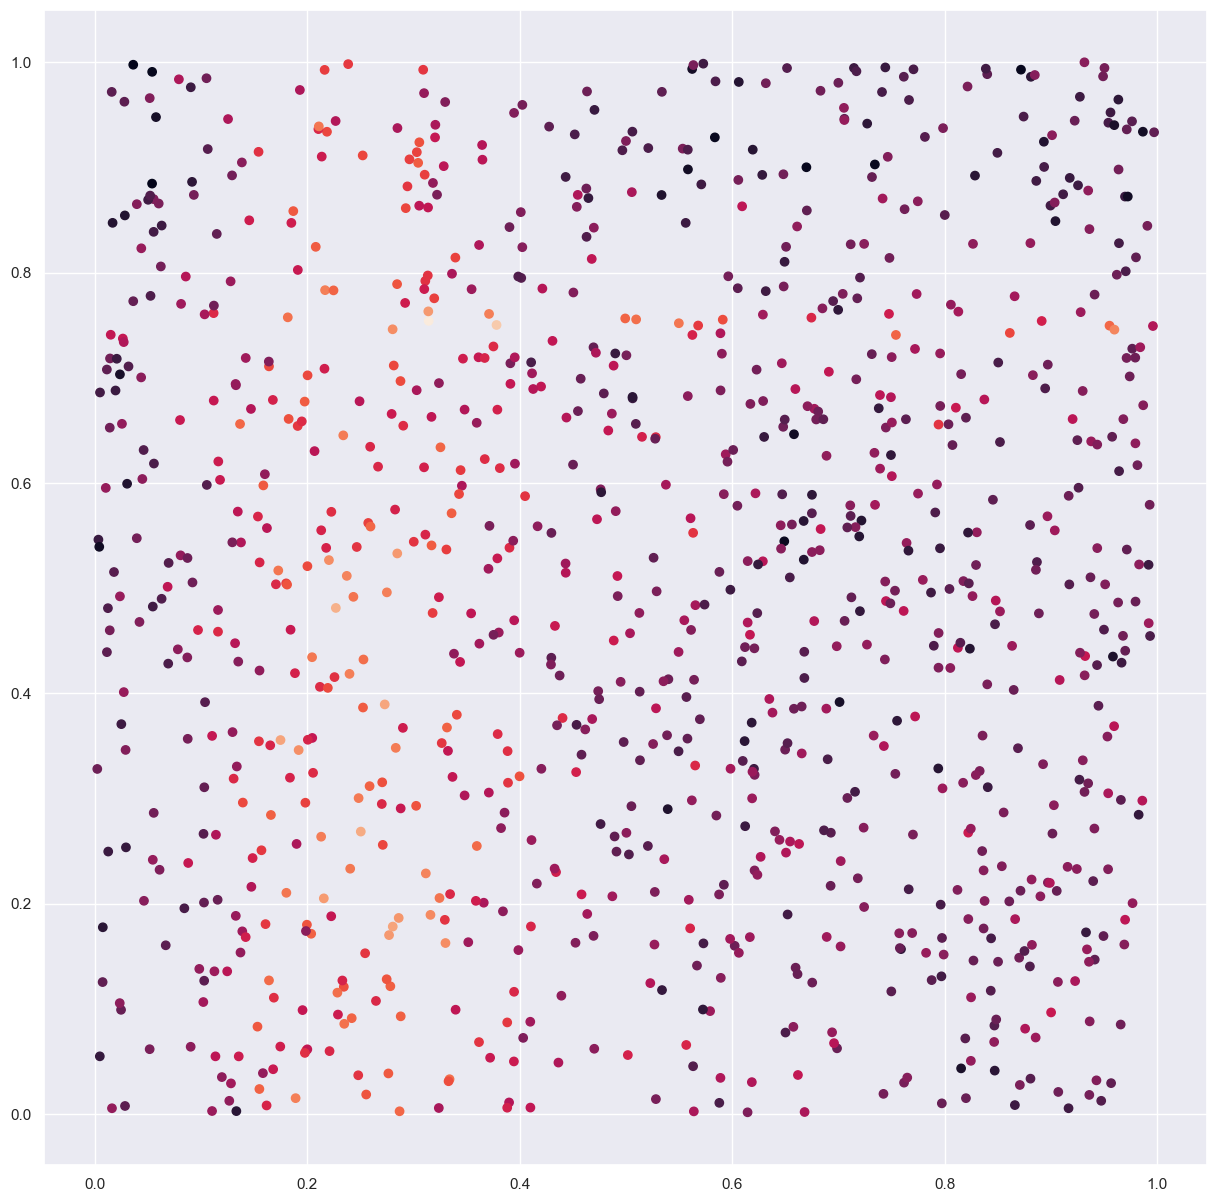

In [21]:
# Plot all points
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(x, y, c = target);

In [22]:
data1 = pd.DataFrame({'x' : x, 'y' : y})
tree_2 = DecisionTreeRegressor(max_depth=10,min_samples_leaf=40)

In [23]:
tree_2.fit(data1,target)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=40)

In [27]:
import graphviz
from sklearn import tree

In [30]:
def boxes(tree,data,labels):
    
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold

    def split(i):
    
        left = children_left[i]
        right = children_right[i]
    
        return (left,right)  


    def parent(i):
        splits = enumerate([split(i) for i in range(n_nodes)])
        for a,b in splits:
            if (b[0] == i) or (b[1] == i):
                return a
            else: continue
    
    
    
    def box(i):
    
        (a,b),(c,d) = (0,0),(0,0)
    
        if i == 0:
            (a,b) = (0,0)
            (c,d) = (1,1)
        else:
            j = parent(i)
            t = threshold[j]
            (a,b),(c,d) = box(j)
            
            if feature[j] == 0:
                if i == split(j)[0]:
                    (a,b) = (a,b)
                    (c,d) = (t,d)
                else:
                    (a,b) = (t,b)
                    (c,d) = (c,d)
                    
            if feature[j] == 1:
                if i == split(j)[0]:
                    (a,b) = (a,b)
                    (c,d) = (c,t)
                else:
                    (a,b) = (a,t)
                    (c,d) = (c,d)
                
        return (a,b),(c,d)

    boxes = []
    for i in range(n_nodes):
        boxes.append(box(i))
        
    fig, ax = plt.subplots(figsize = (10,10))
    ax.scatter(x, y, c = target);



    for i in range(1,n_nodes):
    
        j = parent(i)
        t = threshold[j]
        ((a,b),(c,d)) = boxes[j]
        if feature[j] == 0:
            ax.vlines(t, b, d, colors='k')
        else:
            ax.hlines(t,a,c,colors='k') 
            
    leaves = [x for x in range(n_nodes) if split(x) == (-1,-1)]
    
    leaf_rects = []
    for leaf in leaves:
        ((a,b),(c,d)) = box(leaf)
        rect = Rectangle((a,b), c - a,d - b )
        leaf_rects.append(rect)
        
    
    facecolor = []
    for leaf in leaves:
        data_points_in_rect = []
        for i in range(len(data1)):
            p = data1.iloc[i]
            ((a,b),(c,d)) = boxes[leaf]
            if (p['x'] > a) and (p['x'] <= c) and (p['y'] > b) and (p['y'] <= d):
                data_points_in_rect.append(target[i])
        color = cm.ocean( np.mean(data_points_in_rect))
        facecolor.append(color)  
    
    pc = PatchCollection(leaf_rects, facecolor=facecolor, alpha=0.9,
                         edgecolor='k',linewidths = (10,))
        
    fig,ax = plt.subplots(figsize = (10,10))
    ax.add_collection(pc);

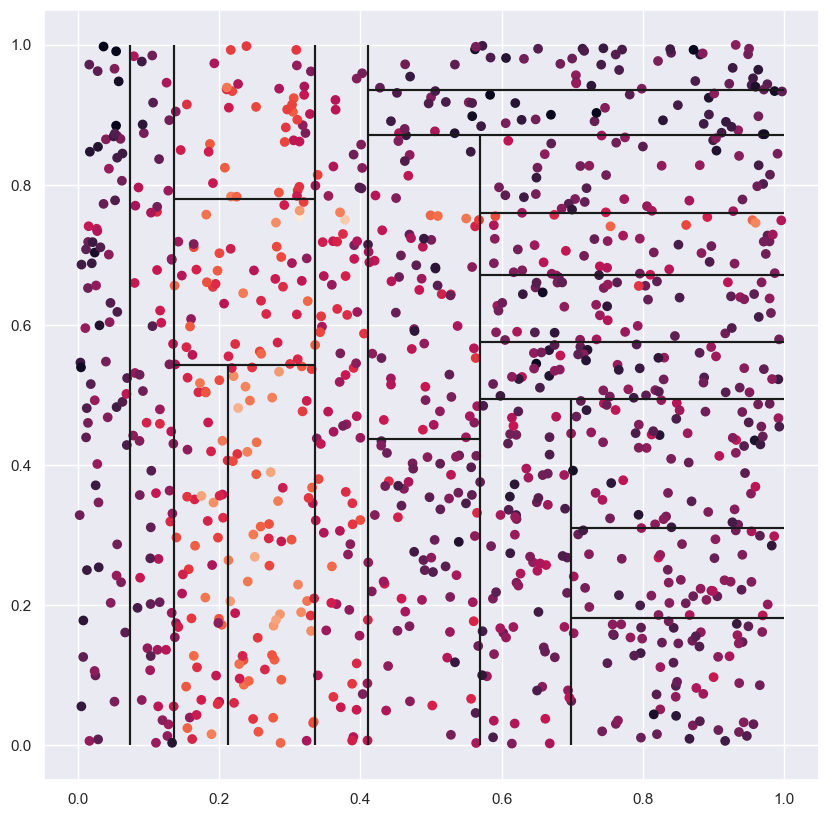

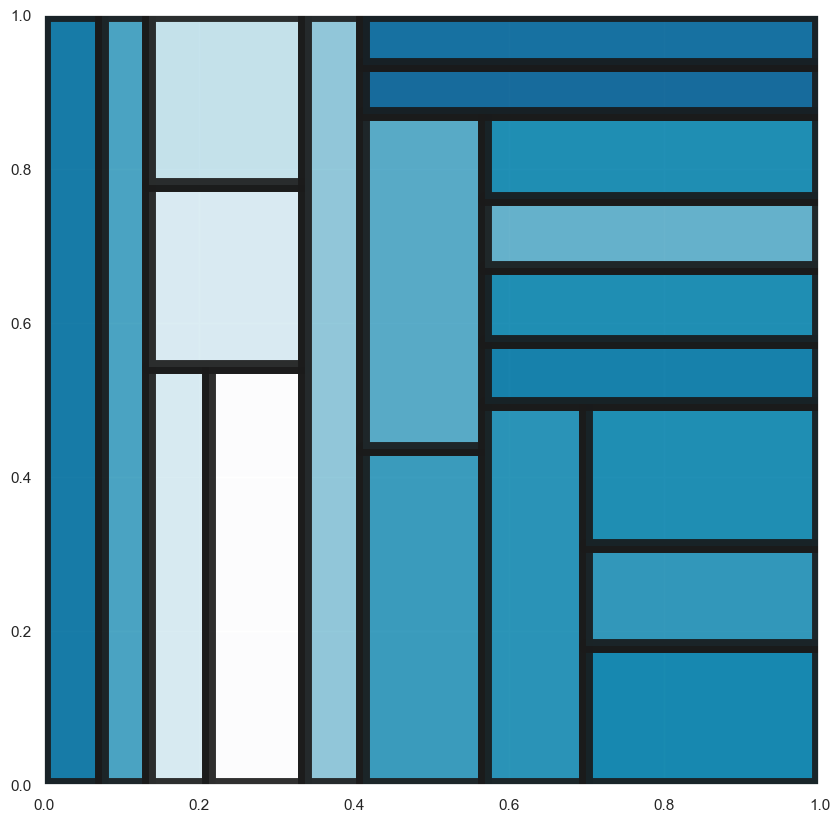

In [31]:
boxes(tree_2,data1,target)